In [95]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Remove font warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

In [96]:
#Reading and printing the head
df = pd.read_csv('Pokemon.csv', index_col=0, encoding = 'unicode_escape')
stats_df = pd.read_csv('Pokemon.csv', index_col=0, encoding = 'unicode_escape')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Stage,Legendary
Num,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


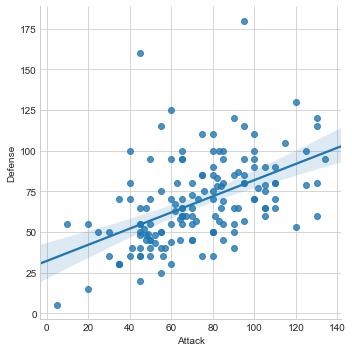

In [97]:
#Scatter Plot
sns.lmplot(x='Attack', y='Defense',data=df)

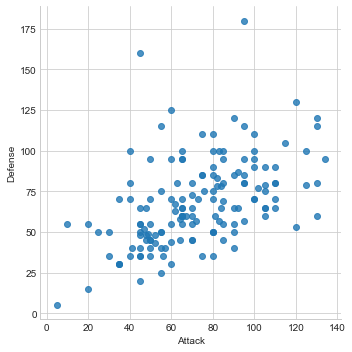

In [98]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False)

(0, 141.95596011521178)

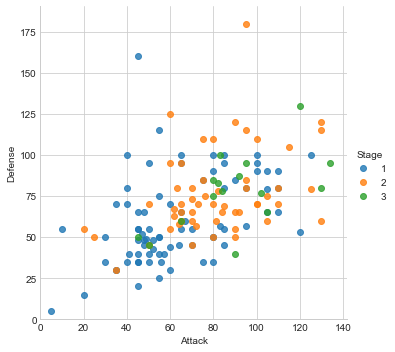

In [99]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')
plt.ylim(0,None)
plt.xlim(0,None)

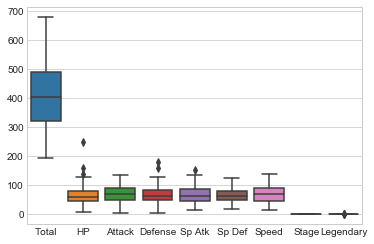

In [100]:
#Boxplot
sns.boxplot(data=df)

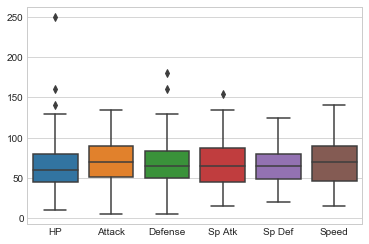

In [101]:
#Removing the unnecessary columns
df = df.drop(['Total','Stage','Legendary'],axis=1)
sns.boxplot(data=df)

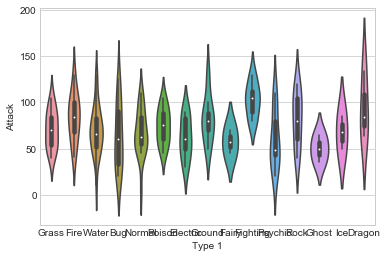

In [102]:
#Setting theme
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df)

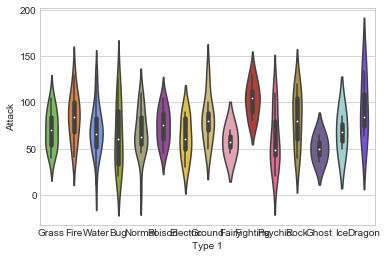

In [103]:
#colour palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)

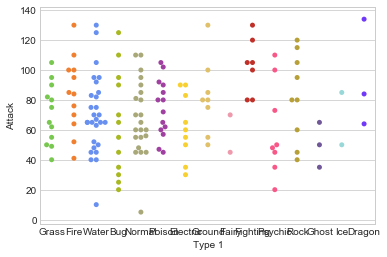

In [104]:
#Swarm Plot
sns.swarmplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors)

Text(0.5,1,'Attack by type')

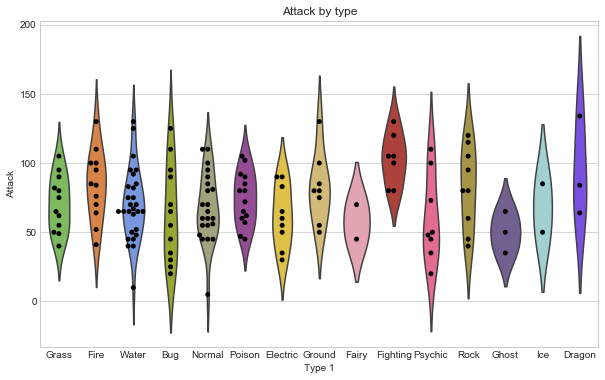

In [105]:
#Overlaying Plots (violin and swarm together)
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1',y='Attack',data=df,inner=None,palette=pkmn_type_colors)
sns.swarmplot(x='Type 1',y='Attack',data=df,color='k',alpha=1)
plt.title("Attack by type")

In [106]:
melted_df = pd.melt(df, id_vars=['Name','Type 1','Type 2'], var_name='Stat')
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


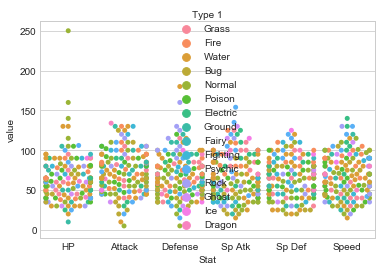

In [107]:
#Swarmplot with melted_df
sns.swarmplot(x='Stat',y='value',data=melted_df,hue='Type 1')

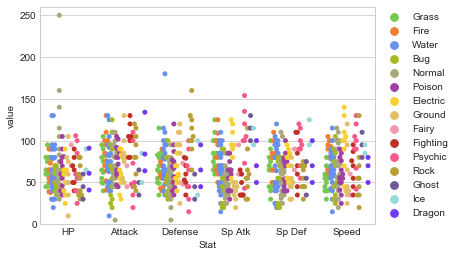

In [108]:
#Swarmplot with melted_df(better version)
sns.swarmplot(x='Stat',y='value',data=melted_df,hue='Type 1',dodge=True,palette=pkmn_type_colors)
plt.ylim(0,260)
plt.legend(bbox_to_anchor=(1,0.5),loc='center left')

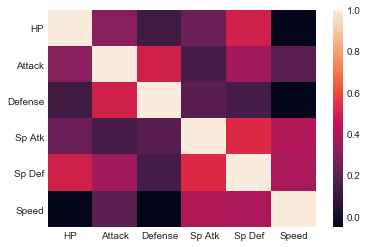

In [109]:
#HeatMap
corr = df.corr()
sns.heatmap(corr)

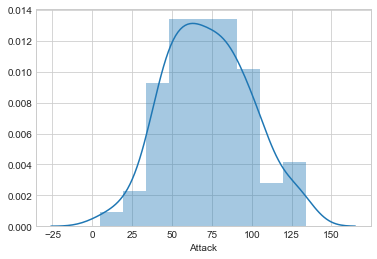

In [110]:
#Histogram Plot or Distribution Plot
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

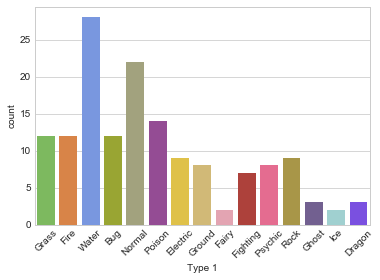

In [111]:
#Bar Plot
sns.countplot(x='Type 1',data=df,palette=pkmn_type_colors)
plt.xticks(rotation = 45)

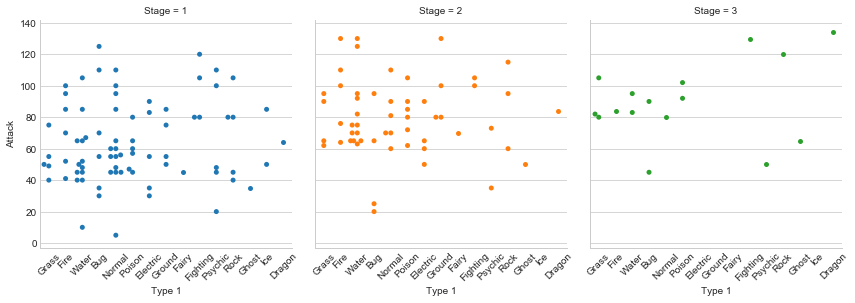

In [112]:
#Factor Plot
g = sns.factorplot(x='Type 1', y='Attack', data=stats_df,hue='Stage',col='Stage',kind='swarm')
g.set_xticklabels(rotation=45)


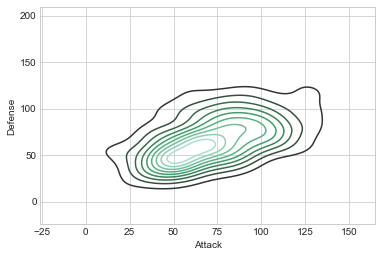

In [113]:
#Density Plot
sns.kdeplot(df.Attack,df.Defense)

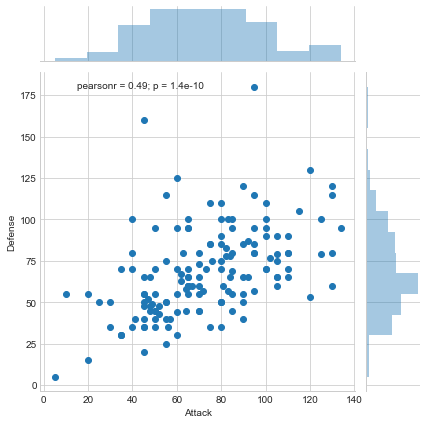

In [114]:
#Joint Distribution Plot
sns.jointplot(x='Attack',y='Defense',data=df)